# Machine Learning

# Part 1: Import packages/libraries

In [ ]:
import pandas
import statistics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 2: Data Cleaning and Pre-Processing

In [ ]:
df = pandas.read_csv('CourseworkData.csv')

In [ ]:
df = pd.read_csv('CourseworkData.csv', usecols = ['Age','SiteSpending','SiteTime','RecommendImpression','Salary'])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Salary', axis=1)
y = df['Salary'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Part 3: Regression

You are required to fit a regression model to predict a
customer’s salary using traditional machine learning methods.
You must describe all relevant details of this implementation and discuss why it was
chosen over other regression models you have experimented with.
For your chosen model choose one appropriate regression evaluation metric, explain
what it tells us about the model and interpret how well your model performs
according to this metric.

### 3.1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X, y)

LinearRegression()

In [ ]:
print("Actual - Predicted ")
for i in range(10):
    print(int(y_test[i:i+1]),'-',int(classifier.predict(X_test[i:i+1])),"  ", int(y_test[i:i+1]) == int(classifier.predict(X_test[i:i+1])))

Actual - Predicted 
76352 - 65779    False
21368 - 46252    False
21954 - 29658    False
115590 - 78920    False
34239 - 27927    False
62524 - 57879    False
42512 - 30193    False
54514 - 38351    False
26314 - 52439    False
73054 - 47708    False


In [ ]:
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.32127061410507196

### 3.2: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=1500)
classifier.fit(X, y)

C:\Users\Nagarjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1500)

In [ ]:
print("Actual - Predicted \n")
for i in range(10):
    print(int(y_test[i:i+1]),'-',int(classifier.predict(X_test[i:i+1])),"  ", int(y_test[i:i+1]) == int(classifier.predict(X_test[i:i+1])))

Actual - Predicted 

76352 - 76352    True
21368 - 21368    True
21954 - 59390    False
115590 - 115590    True
34239 - 34239    True
62524 - 62524    True
42512 - 30191    False
54514 - 54514    True
26314 - 26314    True
73054 - 73054    True


In [ ]:
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.655

# Part 4: Binary Classification

Rather than the exact salary number, it is most
important to know whether a customer is above or below £35K (as an approximate
average salary).
Alter the data accordingly and fit a binary classification model using traditional
Machine Learning methods, describing all relevant details of this implementation and
discussing why it was chosen over other classification models you have
experimented with.
Provide and interpret the confusion matrix for this model and choose one
classification accuracy metric that you aimed to maximise for this problem, explain
why you chose this metric and interpret how well your model performs according to
this metric.

In [ ]:
df["Isabove35k"] = np.where(df["Salary"] >= 35000, 1, 0)
df.head(5)

,Age,SiteSpending,SiteTime,RecommendImpression,Salary,Isabove35k
0,32,314.06,30.14,0,60173.49,1
1,20,3758.36,149.36,4,42965.45,1
2,36,601.72,21.87,0,54924.41,1
3,21,44.89,182.80,9,26734.99,0
4,24,614.80,194.34,0,15325.23,0


### 4.1: Logistic Regression

In [ ]:
X = df.drop(['Salary','Isabove35k'], axis=1)
y = df['Isabove35k'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("\n Classification Report: \n", classification_report(y_test, y_preds))

Confusion_matrix: 
 [[ 26  44]
 [ 26 104]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.37      0.43        70
           1       0.70      0.80      0.75       130

    accuracy                           0.65       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.63      0.65      0.64       200



In [ ]:
print("Actual - Predicted - IsPredictedCorrect \n")
for i in range(10):
    print(int(y_test[i:i+1]),'-',int(classifier.predict(X_test[i:i+1])),"  ", int(y_test[i:i+1]) == int(classifier.predict(X_test[i:i+1])))

Actual - Predicted - IsPredictedCorrect 

1 - 1    True
0 - 1    False
0 - 0    True
1 - 1    True
0 - 0    True
1 - 1    True
1 - 0    False
1 - 1    True
0 - 1    False
1 - 1    True


### 4.2: K-Neighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("\n Classification Report: \n", classification_report(y_test, y_preds))

Confusion_matrix: 
 [[ 24  46]
 [ 22 108]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.34      0.41        70
           1       0.70      0.83      0.76       130

    accuracy                           0.66       200
   macro avg       0.61      0.59      0.59       200
weighted avg       0.64      0.66      0.64       200



In [ ]:
print("Actual - Predicted - IsPredictedCorrect \n")
for i in range(10):
    print(int(y_test[i:i+1]),'-',int(classifier.predict(X_test[i:i+1])),"  ", int(y_test[i:i+1]) == int(classifier.predict(X_test[i:i+1])))

Actual - Predicted - IsPredictedCorrect 

1 - 1    True
0 - 1    False
0 - 0    True
1 - 1    True
0 - 0    True
1 - 1    True
1 - 1    True
1 - 0    False
0 - 1    False
1 - 1    True


### 4.3: DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("\n Classification Report: \n", classification_report(y_test, y_preds))

Confusion_matrix: 
 [[ 66   4]
 [ 12 118]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        70
           1       0.97      0.91      0.94       130

    accuracy                           0.92       200
   macro avg       0.91      0.93      0.91       200
weighted avg       0.92      0.92      0.92       200



In [ ]:
print("Actual - Predicted - IsPredictedCorrect \n")
for i in range(10):
    print(int(y_test[i:i+1]),'-',int(classifier.predict(X_test[i:i+1])),"  ", int(y_test[i:i+1]) == int(classifier.predict(X_test[i:i+1])))

Actual - Predicted - IsPredictedCorrect 

1 - 1    True
0 - 0    True
0 - 0    True
1 - 1    True
0 - 0    True
1 - 1    True
1 - 1    True
1 - 1    True
0 - 0    True
1 - 1    True


### 4.4: Support Vector Machines

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("\n Classification Report: \n", classification_report(y_test, y_preds))

Confusion_matrix: 
 [[24 46]
 [31 99]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.34      0.38        70
           1       0.68      0.76      0.72       130

    accuracy                           0.61       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.60      0.61      0.60       200



In [ ]:
print("Actual - Predicted - IsPredictedCorrect \n")
for i in range(10):
    print(int(y_test[i:i+1]),'-',int(classifier.predict(X_test[i:i+1])),"  ", int(y_test[i:i+1]) == int(classifier.predict(X_test[i:i+1])))

Actual - Predicted - IsPredictedCorrect 

1 - 1    True
0 - 1    False
0 - 0    True
1 - 1    True
0 - 0    True
1 - 1    True
1 - 0    False
1 - 0    False
0 - 1    False
1 - 1    True


### 4.5: NaiveBayes GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("\n Classification Report: \n", classification_report(y_test, y_preds))

Confusion_matrix: 
 [[52 18]
 [36 94]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.74      0.66        70
           1       0.84      0.72      0.78       130

    accuracy                           0.73       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.75      0.73      0.74       200



In [ ]:
print("Actual - Predicted - IsPredictedCorrect \n")
for i in range(10):
    print(int(y_test[i:i+1]),'-',int(classifier.predict(X_test[i:i+1])),"  ", int(y_test[i:i+1]) == int(classifier.predict(X_test[i:i+1])))

Actual - Predicted - IsPredictedCorrect 

1 - 1    True
0 - 0    True
0 - 0    True
1 - 1    True
0 - 0    True
1 - 1    True
1 - 0    False
1 - 1    True
0 - 1    False
1 - 1    True


# Part 5: Neural Network

Design and train a Neural Network to solve the same binary classification problem
solved in Part 4. You must describe in detail and justify with evidence of
experimentation why you have chosen this Neural Network architecture and the
values of the hyperparameters used.
Compare the performance of your Neural Network with the final Binary Classification
model chosen in Part 4.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, callbacks=[es], epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
64/64 [==============================] - 3s 12ms/step - loss: 15.7751 - accuracy: 0.5500 - val_loss: 1.9523 - val_accuracy: 0.6062
Epoch 2/80
64/64 [==============================] - 0s 3ms/step - loss: 2.0324 - accuracy: 0.5469 - val_loss: 2.6363 - val_accuracy: 0.6500
Epoch 3/80
64/64 [==================

In [ ]:
print("Actual - Predicted \n")
for i in range(10):
    print(int(y_test[i:i+1]),'-',model.predict(X_test[i:i+1]))

Actual - Predicted 

1/1 [==============================] - 0s 277ms/step
1 - [[0.90331006]]
1/1 [==============================] - 0s 33ms/step
0 - [[0.8825592]]
1/1 [==============================] - 0s 30ms/step
0 - [[0.464061]]
1/1 [==============================] - 0s 30ms/step
1 - [[0.8600474]]
1/1 [==============================] - 0s 31ms/step
0 - [[0.5517554]]
1/1 [==============================] - 0s 32ms/step
1 - [[0.95595336]]
1/1 [==============================] - 0s 31ms/step
1 - [[0.5863705]]
1/1 [==============================] - 0s 26ms/step
1 - [[0.84375316]]
1/1 [==============================] - 0s 33ms/step
0 - [[0.35461518]]
1/1 [==============================] - 0s 40ms/step
1 - [[0.47751474]]


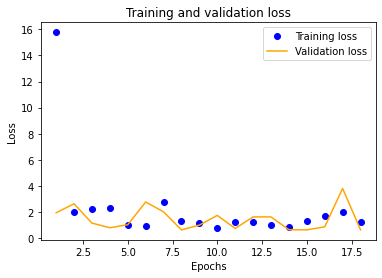

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

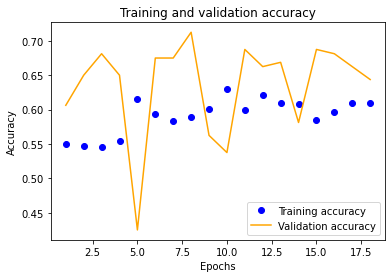

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')

plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model.predict(X_test)
np.round(model.predict(X_test),0)
preds = np.round(model.predict(X_test),0)

print("\n Confusion matrix:")
print(confusion_matrix(y_test, preds))
print("\n Evaluation Report:")
print(classification_report(y_test, preds))

7/7 [==============================] - 0s 2ms/step

 Confusion matrix:
[[36 34]
 [36 94]]

 Evaluation Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51        70
           1       0.73      0.72      0.73       130

    accuracy                           0.65       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.65      0.65      0.65       200



# Part 6: K-means Clustering

Splitting the customers into only two groups
may be naïve and missing some important information, however it isn’t immediately
obvious how many groups there should be.
Perform clustering using the k-means clustering algorithm on the customers salary
against any other variables you feel are appropriate. You should choose a value for k
you feel best groups the customers, justifying why this value was chosen with
experimentation and discussing any other insights this task has given you about
relationships in the data.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
kdf = df.drop(['SiteTime','RecommendImpression'], axis=1)

Text(0, 0.5, 'Salary')

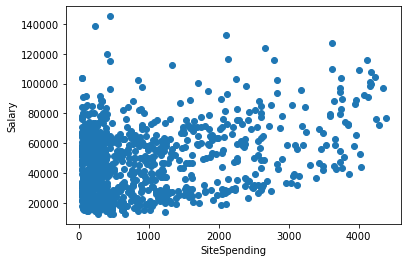

In [ ]:
plt.scatter(kdf['SiteSpending'],kdf['Salary'])
plt.xlabel('SiteSpending')
plt.ylabel('Salary')

In [ ]:
scaler = MinMaxScaler()

scaler.fit(kdf[['SiteSpending']])
kdf['SiteSpending'] = scaler.transform(kdf[['SiteSpending']])

scaler.fit(kdf[['Salary']])
kdf['Salary'] = scaler.transform(kdf[['Salary']])

### SiteSpending vs Salary

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SiteSpending','Salary']])
    sse.append(km.inertia_)

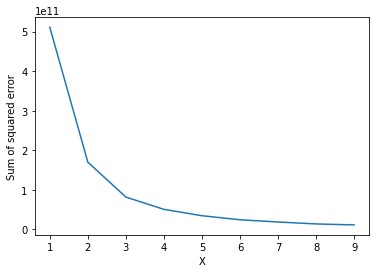

In [ ]:
plt.xlabel('X')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(kdf[['SiteSpending','Salary']])
kdf['cluster'] = y_predicted

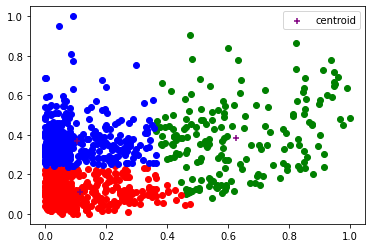

In [ ]:
kdf1 = kdf[kdf.cluster==0]
kdf2 = kdf[kdf.cluster==1]
kdf3 = kdf[kdf.cluster==2]
plt.scatter(kdf1.SiteSpending,kdf1['Salary'],color='green')
plt.scatter(kdf2.SiteSpending,kdf2['Salary'],color='red')
plt.scatter(kdf3.SiteSpending,kdf3['Salary'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="+",label='centroid')
plt.legend()